In [10]:
import numpy as np
import keras
from keras.datasets import reuters

In [11]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(path='reuters.npz', num_words=10000)

In [12]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[1]])
print(decoded_newswire)

? generale de banque sa lt ? br and lt heller overseas corp of chicago have each taken 50 pct stakes in ? company sa ? factors generale de banque said in a statement it gave no financial details of the transaction sa ? ? turnover in 1986 was 17 5 billion belgian francs reuter 3


In [13]:
import numpy as np

# 0 matrix - [sequences, dimension]
def vectorize_sequences(sequences, dimension=10_000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # 데이터가 있는 특정 인덱스의 위치를 1로 만듦 --> one-hot encoding

    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [14]:
print(x_train[:5])

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


In [15]:

# # Encoding the labels
# def to_one_hot(labels, dimensions=46):
#     results = np.zeros((len(labels), dimensions))
    
#     for i, label in enumerate(labels):
#         results[i, label] = 1. 
#     return results

# y_train = to_one_hot(train_labels)
# y_test = to_one_hot(test_labels)

# print(y_train)


In [16]:
from keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [20]:
from keras import models, layers, activations

model = keras.Sequential([
    layers.Input(shape=(10000,)),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax"),
])

In [22]:
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=[keras.metrics.BinaryAccuracy()]
)

In [24]:
from sklearn.model_selection import train_test_split

# 검증 세트 분할
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train,
    test_size=1000,
)

In [25]:
history = model.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20


2025-01-01 16:21:24.163606: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - binary_accuracy: 0.9791 - loss: 2.9172 - val_binary_accuracy: 0.9857 - val_loss: 1.7015
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - binary_accuracy: 0.9868 - loss: 1.5640 - val_binary_accuracy: 0.9890 - val_loss: 1.3626
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - binary_accuracy: 0.9899 - loss: 1.1826 - val_binary_accuracy: 0.9903 - val_loss: 1.1621
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - binary_accuracy: 0.9916 - loss: 0.9503 - val_binary_accuracy: 0.9905 - val_loss: 1.0759
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - binary_accuracy: 0.9926 - loss: 0.7722 - val_binary_accuracy: 0.9913 - val_loss: 0.9809
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - binary_accuracy: 0.9937 - loss: 0.6375 - val_binary_accuracy: 0.9914 - val_loss: 0.9585
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - binary_accuracy: 0.9946 - loss: 0.5284 - val_binary_accuracy: 0.9918 - val_loss: 0.9201
Epoch 8/20
16/16 ━━━━━━━

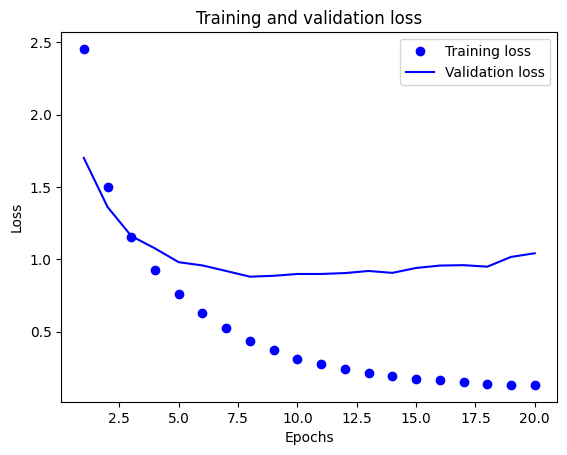

In [26]:
# graph (훈련 : 검증 손실)
import matplotlib.pyplot as plt

history_dict = history.history
epochs = range(1, len(history_dict['loss']) + 1)

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

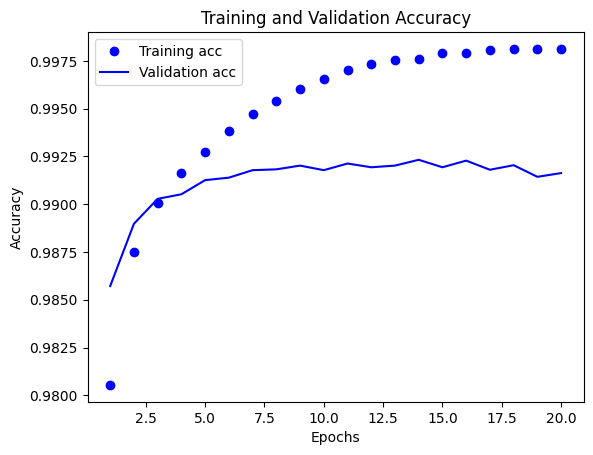

In [27]:
# graph (훈련 : 검증 정확도)
plt.clf() # 그래프 초기화

acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [29]:
predictions = model.predict(x_test)
predictions[0].shape

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


(46,)